In [16]:
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from datetime import date
import vectorbt as vbt

<AxesSubplot:xlabel='Date'>

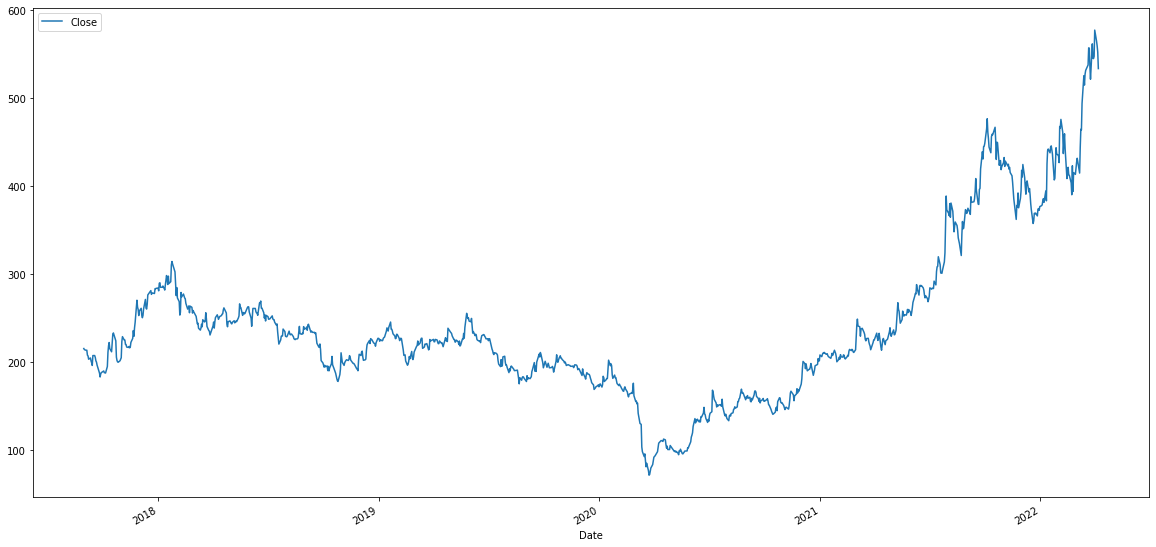

In [48]:
ghcl = yf.Ticker('GHCL.NS')
start_date = date(2017,8,31)
end_date = date(2022,4,8)

ghcl_df = ghcl.history(start=start_date,
                   end=end_date)
ghcl_df[['Close']].plot(figsize=(20,10))

In [49]:
supertrend = ghcl_df.ta.supertrend(period=10, multiplier=3)
print(supertrend.to_string())

            SUPERT_7_3.0  SUPERTd_7_3.0  SUPERTl_7_3.0  SUPERTs_7_3.0
Date                                                                 
2017-08-31      0.000000              1            NaN            NaN
2017-09-01           NaN              1            NaN            NaN
2017-09-04           NaN              1            NaN            NaN
2017-09-05           NaN              1            NaN            NaN
2017-09-06           NaN              1            NaN            NaN
2017-09-07           NaN              1            NaN            NaN
2017-09-08           NaN              1            NaN            NaN
2017-09-11    189.358035              1     189.358035            NaN
2017-09-12    189.358035              1     189.358035            NaN
2017-09-13    189.358035              1     189.358035            NaN
2017-09-14    189.358035              1     189.358035            NaN
2017-09-15    189.358035              1     189.358035            NaN
2017-09-18    189.35

In [50]:
ghcl_df["supertrend"] = supertrend['SUPERTd_7_3.0'] == 1
print(ghcl_df.loc['2021-11-15'])

Open                 417.5
High            417.950012
Low             393.200012
Close           411.799988
Volume              191453
Dividends              0.0
Stock Splits             0
supertrend            True
Name: 2021-11-15 00:00:00, dtype: object


In [41]:
# Create boolean Signals(TS_Entries, TS_Exits) for vectorbt
supertrend_signal = ghcl_df.ta.tsignals(ghcl_df.supertrend, asbool=True, append=True)

# Sanity Check (Ensure data exists)
print(ghcl_df)

# Create the Signals Portfolio
pf = vbt.Portfolio.from_signals(ghcl_df.Close, entries=supertrend_signal.TS_Entries, exits=supertrend_signal.TS_Exits, freq="D", init_cash=100_000, fees=0.0025, slippage=0.0025)

# Print Portfolio Stats and Return Stats
print(pf.stats())
print(pf.returns_stats())

                  Open        High         Low       Close   Volume  \
Date                                                                  
2021-08-31  375.000000  378.850006  367.500000  371.799988   557712   
2021-09-01  374.700012  377.799988  363.200012  368.950012   560825   
2021-09-02  370.000000  374.299988  365.899994  370.700012   416923   
2021-09-03  372.899994  377.000000  369.299988  374.850006   605217   
2021-09-06  376.799988  377.799988  366.399994  370.350006   337541   
...                ...         ...         ...         ...      ...   
2022-04-01  548.500000  584.000000  548.500000  577.450012  1029052   
2022-04-04  569.000000  579.799988  561.000000  565.000000   423018   
2022-04-05  569.849976  577.000000  553.349976  559.700012   336799   
2022-04-06  555.099976  564.450012  543.299988  552.349976   354290   
2022-04-07  549.000000  561.799988  525.150024  533.700012   349981   

            Dividends  Stock Splits  supertrend  TS_Trends  TS_Trades  \
Dat

In [42]:
pf.plot().show()


In [47]:
ghcl

yfinance.Ticker object <GHCL.NS>